In [53]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import networkx as nx
import numpy as np

#指定中文字体
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 提取数据集
bike_sharing = fetch_ucirepo(id=275)

# 数据（转换为 pandas 的 DataFrame）
data = bike_sharing.data.features
targets = bike_sharing.data.targets


In [136]:
# 统计基本信息
df = pd.DataFrame(data)
print('统计基本信息')
#  查看数据的形状
print(f"数据的形状：{df.shape}")

#  查看数据的列信息
print(f"数据的列名：{df.columns}")

#  查看数据的类型
print(f"数据的类型：{df.dtypes}")

# 查看数据的描述性统计信息
print(f"数据的描述性统计：\n{df.describe()}")

# 查看是否有缺失值
print(f"数据是否有缺失值：\n{df.isnull().any()}")

统计基本信息
数据的形状：(17379, 13)
数据的列名：Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
数据的类型：dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
dtype: object
数据的描述性统计：
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.00

散点图


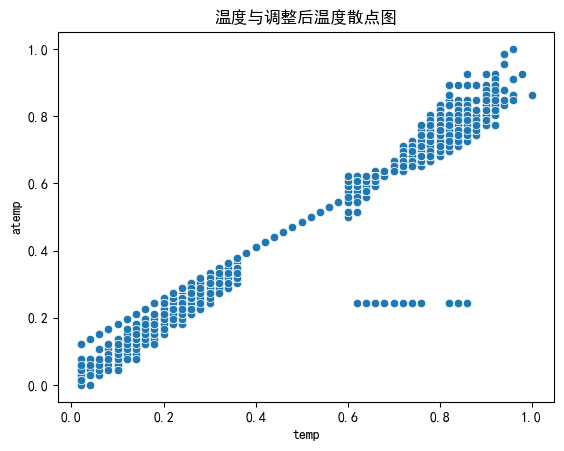

In [68]:
# 排除日期列 减少计算难度
data_no_date = data.drop(columns=['dteday'])

# 散点图
print('散点图')
sns.scatterplot(data=data_no_date, x='temp', y='atemp')
plt.title('温度与调整后温度散点图')
plt.show()

气泡图


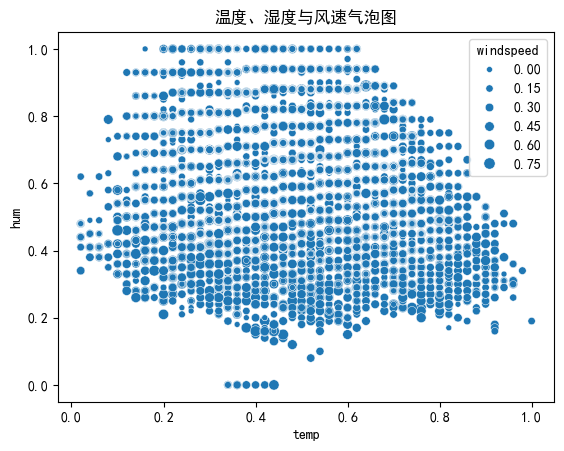

In [70]:
# 气泡图
print('气泡图')
sns.scatterplot(data=data_no_date, x='temp', y='hum', size='windspeed')
plt.title('温度、湿度与风速气泡图')
plt.show()

竖向柱形图


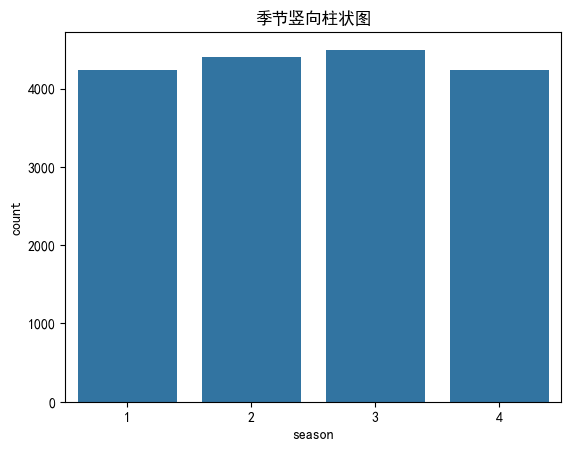

In [72]:
# 竖向柱状图（以季节为例）
print('竖向柱形图')
sns.countplot(data=data_no_date, x='season')
plt.title('季节竖向柱状图')
plt.show()


横向柱形图


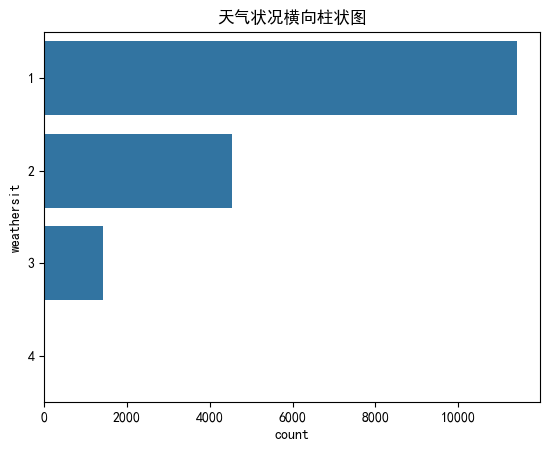

In [74]:
# 横向柱状图（以天气状况为例）
print('横向柱形图')
sns.countplot(data=data_no_date, y='weathersit')
plt.title('天气状况横向柱状图')
plt.show()


极坐标柱形图


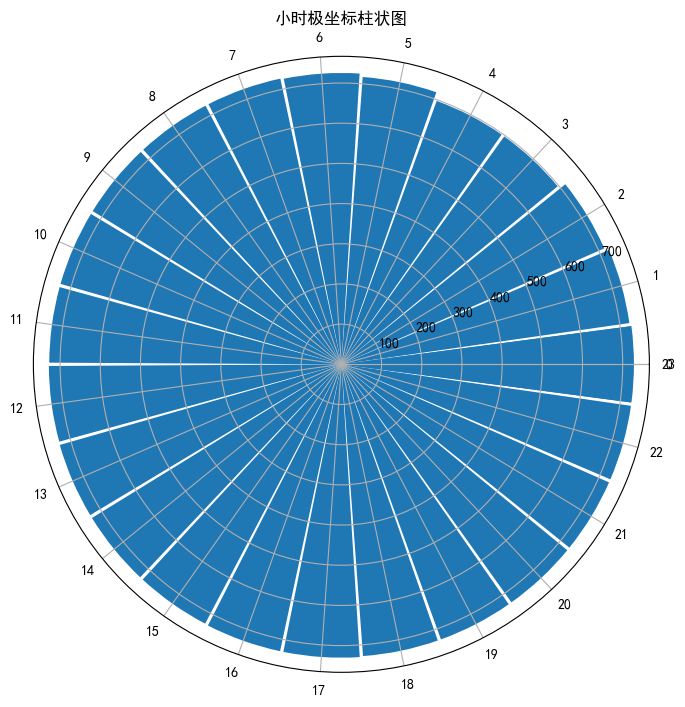

In [76]:
# 极坐标柱状图（以小时为例）
print('极坐标柱形图')
hours = data_no_date['hr'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
theta = np.linspace(0, 2 * np.pi, len(hours))
width = (2 * np.pi) / len(hours)
bars = ax.bar(theta, hours, width=width, bottom=0)
ax.set_xticks(theta)
ax.set_xticklabels(range(0, 24))
plt.title('小时极坐标柱状图')
plt.show()

有数据信息的饼状图


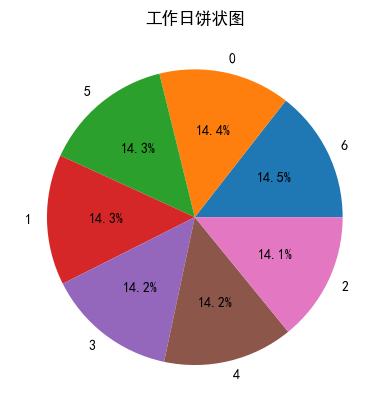

In [78]:
# 有数据信息的饼状图（以工作日为例）
print('有数据信息的饼状图')
weekday_counts = data_no_date['weekday'].value_counts()
plt.pie(weekday_counts, labels=weekday_counts.index, autopct='%1.1f%%')
plt.title('工作日饼状图')
plt.show()

 收缩显示的饼状图


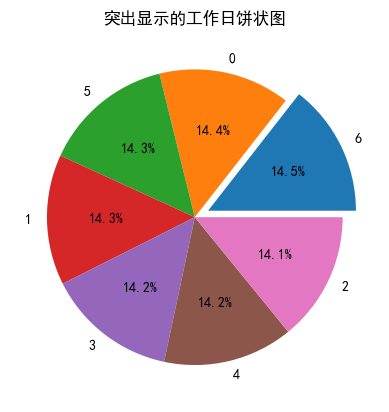

In [80]:
# 收缩显示的饼状图（突出显示某一个工作日，比如 0）
print(' 收缩显示的饼状图')
explode = [0.1 if i == 0 else 0 for i in range(len(weekday_counts))]
plt.pie(weekday_counts, labels=weekday_counts.index, autopct='%1.1f%%', explode=explode)
plt.title('突出显示的工作日饼状图')
plt.show()


立体线形图


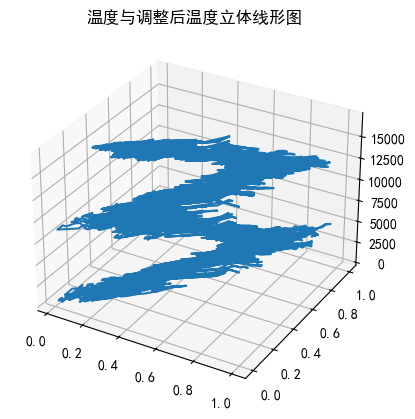

In [82]:
# 立体线形图（以温度和调整后温度的变化趋势为例）
print('立体线形图')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data_no_date['temp'], data_no_date['atemp'], np.arange(len(data_no_date)))
plt.title('温度与调整后温度立体线形图')
plt.show()

立体散点图


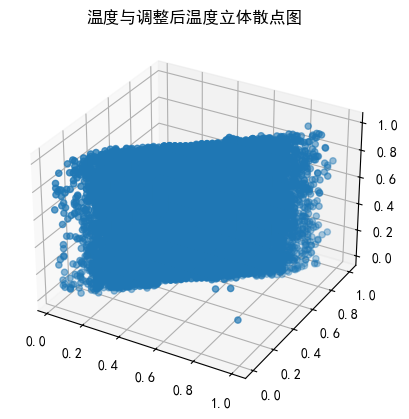

In [84]:
# 立体散点图（以温度和调整后温度为例）
print('立体散点图')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_no_date['temp'], data_no_date['atemp'], np.random.rand(len(data_no_date)))
plt.title('温度与调整后温度立体散点图')
plt.show()

立体柱状图


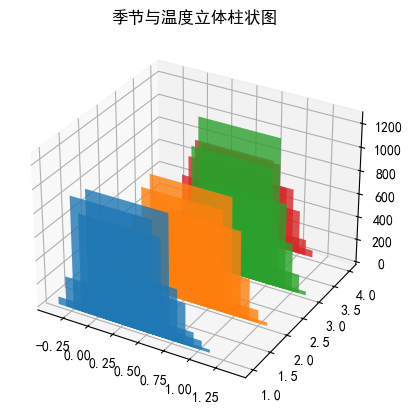

In [86]:
# 立体柱状图（以季节和温度为例）
print('立体柱状图')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for season in data_no_date['season'].unique():
    season_data = data_no_date[data_no_date['season'] == season]['temp']
    hist, bins = np.histogram(season_data, bins=10)
    xs = np.linspace(min(bins), max(bins), len(hist))
    ax.bar(xs, hist, zs=season, zdir='y', alpha=0.8)
plt.title('季节与温度立体柱状图')
plt.show()

热力图


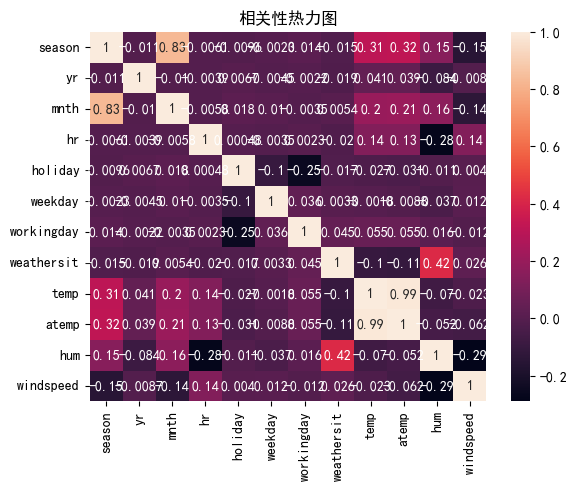

In [88]:
# 热力图（计算相关性矩阵并绘制）
print('热力图')
corr_matrix = data_no_date.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('相关性热力图')
plt.show()


箱线图


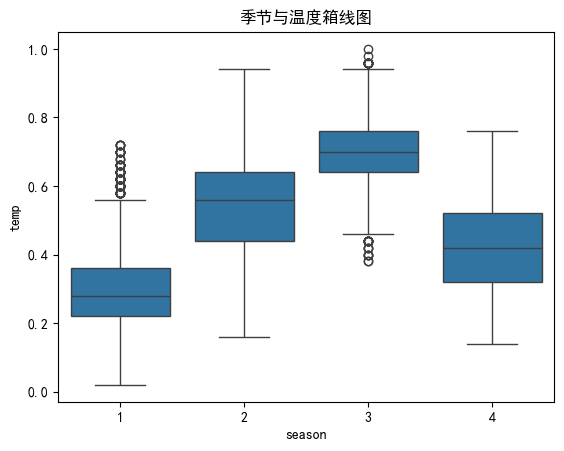

In [90]:
# 箱线图（以季节和温度为例）
print('箱线图')
sns.boxplot(data=data_no_date, x='season', y='temp')
plt.title('季节与温度箱线图')
plt.show()

小提琴图


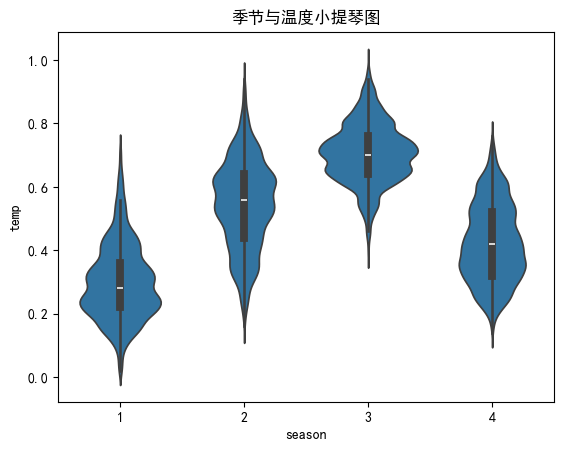

In [92]:
# 小提琴图（以季节和温度为例）
print('小提琴图')
sns.violinplot(data=data_no_date, x='season', y='temp')
plt.title('季节与温度小提琴图')
plt.show()

不同特征组合图


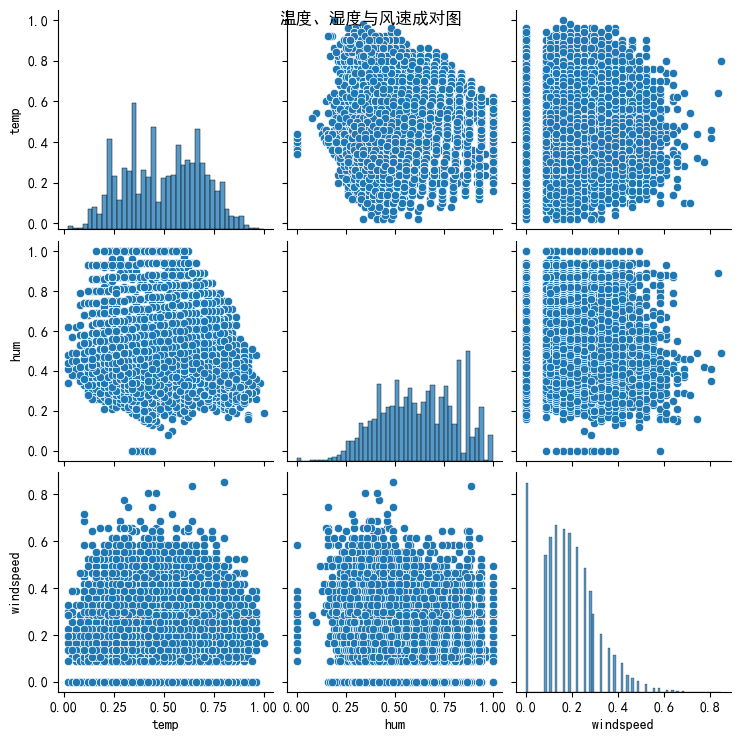

In [94]:
# 不同特征组合图（例如温度、湿度和风速的关系）
print('不同特征组合图')
sns.pairplot(data_no_date[['temp', 'hum', 'windspeed']])
plt.suptitle('温度、湿度与风速成对图')
plt.show()

带有逻辑回归模型的嵌入式散点分布图


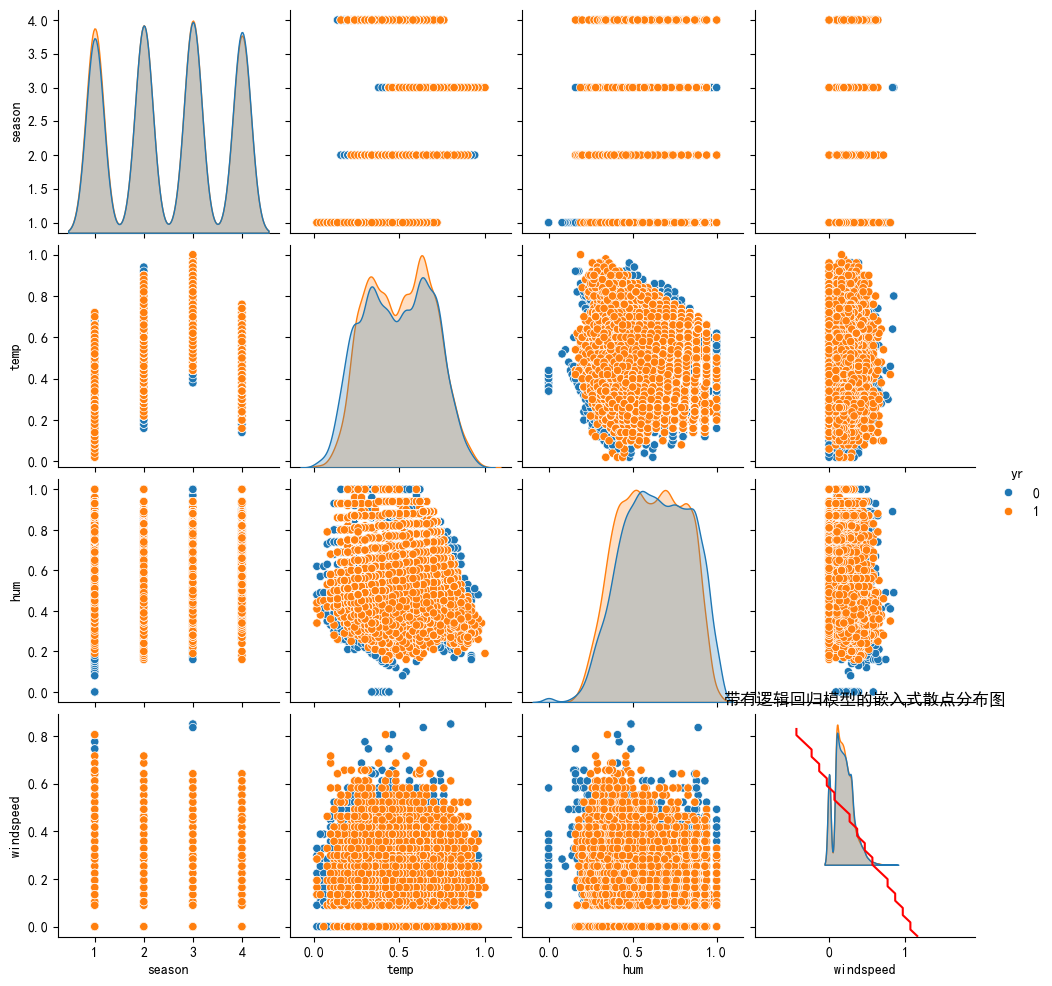

In [134]:
import warnings

print('带有逻辑回归模型的嵌入式散点分布图')
# 选择部分特征用于可视化和建模
selected_features = ['season', 'temp', 'hum', 'windspeed']
data_for_plotting = data_no_date[selected_features]
target = data_no_date['yr']  # 根据实际情况修改目标列名称

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data_for_plotting, target, test_size=0.2, random_state=42)

# 创建逻辑回归模型并训练
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 预测测试集
y_pred = logreg.predict(X_test)

# 使用 seaborn 的 pairplot 绘制散点图矩阵，并区分不同目标类别
sns.pairplot(pd.concat([data_for_plotting, pd.DataFrame({'yr': target})], axis=1), hue='yr', vars=selected_features)

# 添加逻辑回归模型的决策边界（此部分较为复杂，需要根据具体特征维度进行计算和绘制，这里仅为示意）
# 假设二维情况，以 temp 和 hum 为例
temp_min, temp_max = data_for_plotting['temp'].min() - 1, data_for_plotting['temp'].max() + 1
hum_min, hum_max = data_for_plotting['hum'].min() - 1, data_for_plotting['hum'].max() + 1
# 创建一个与训练数据特征数量相同的网格数据
xx, yy = np.meshgrid(np.arange(temp_min, temp_max, 0.1),
                     np.arange(hum_min, hum_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]
# 填充其他两个特征为固定值，这里假设为均值
other_features_mean = np.array([data_for_plotting['season'].mean(), data_for_plotting['windspeed'].mean()])
full_grid_points = np.repeat(other_features_mean[np.newaxis, :], len(grid_points), axis=0)
full_grid_points = np.c_[full_grid_points, grid_points]

# 临时忽略警告
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Z = logreg.predict(full_grid_points)

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='r')

plt.title('带有逻辑回归模型的嵌入式散点分布图')
plt.show()

线性回归模型图


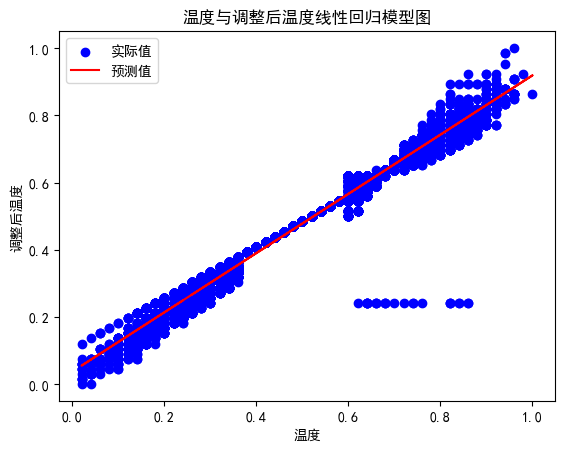

In [96]:
# 线性回归模型图（假设以温度和调整后温度进行线性回归）
print('线性回归模型图')
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_temp = data_no_date[['temp']]
y_atemp = data_no_date['atemp']
model.fit(X_temp, y_atemp)
y_pred = model.predict(X_temp)
plt.scatter(X_temp, y_atemp, color='blue', label='实际值')
plt.plot(X_temp, y_pred, color='red', label='预测值')
plt.title('温度与调整后温度线性回归模型图')
plt.xlabel('温度')
plt.ylabel('调整后温度')
plt.legend()
plt.show()


聚类模型图


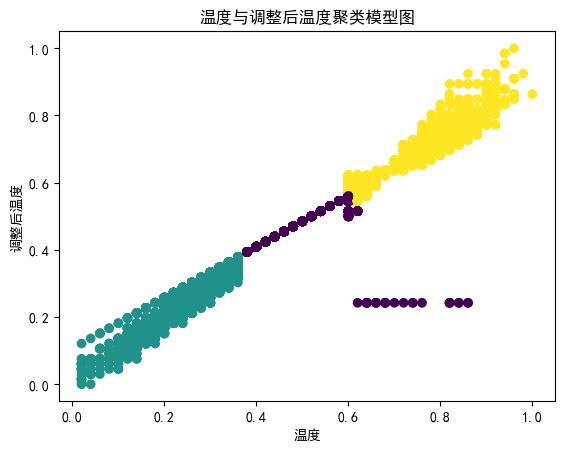

In [98]:
# 聚类模型图（以 KMeans 聚类为例，假设对温度和调整后温度进行聚类）
print('聚类模型图')
kmeans = KMeans(n_clusters=3)
X_cluster = data_no_date[['temp', 'atemp']]
kmeans.fit(X_cluster)
labels = kmeans.labels_
plt.scatter(X_cluster['temp'], X_cluster['atemp'], c=labels)
plt.title('温度与调整后温度聚类模型图')
plt.xlabel('温度')
plt.ylabel('调整后温度')
plt.show()

决策树模型图


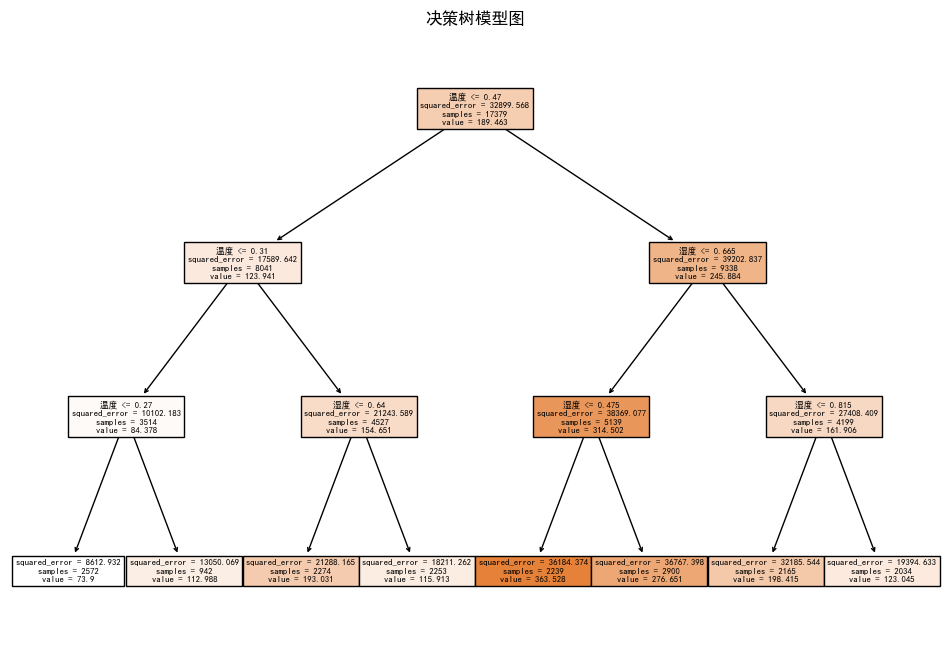

In [100]:
# 决策树模型图（假设以温度、湿度和风速预测某个目标）
print('决策树模型图')
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dtree = DecisionTreeRegressor(max_depth=3)
X_tree = data_no_date[['temp', 'hum', 'windspeed']]
y_tree = targets['cnt']
dtree.fit(X_tree, y_tree)
fig = plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, feature_names=['温度', '湿度', '风速'], filled=True)
plt.title('决策树模型图')
plt.show()

多棵决策树模型图


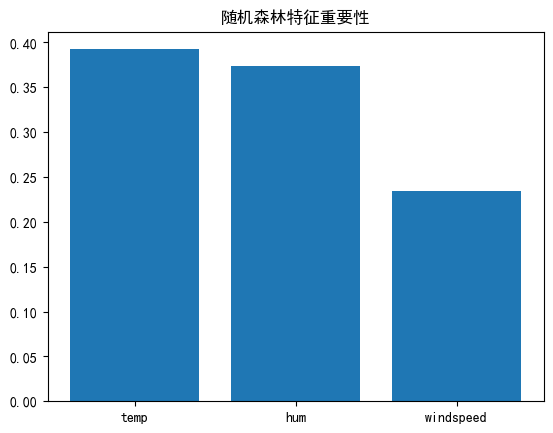

In [102]:
# 多棵决策树模型图（随机森林）
print('多棵决策树模型图')
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_tree, y_tree)
# 这里可以根据需要进行可视化，例如展示特征重要性
feature_importances = rf.feature_importances_
plt.bar(X_tree.columns, feature_importances)
plt.title('随机森林特征重要性')
plt.show()

相关性网络图


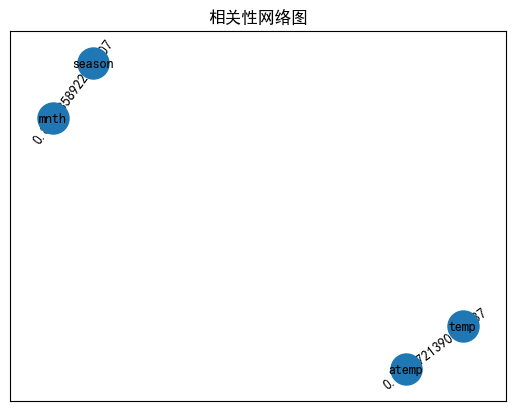

In [104]:
# 相关性网络图
print('相关性网络图')
corr_matrix = data_no_date.corr()
G = nx.Graph()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:  # 设置相关性阈值
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=corr_matrix.iloc[i, j])
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=500, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('相关性网络图')
plt.show()

圆盘状显示网络图


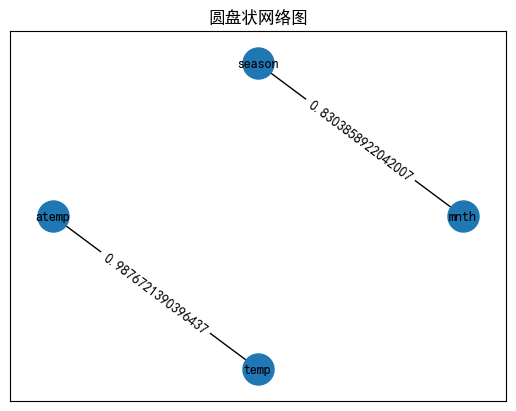

In [106]:
# 圆盘状显示的网络图
print('圆盘状显示网络图')
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=500, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('圆盘状网络图')
plt.show()

含属性及边的颜色及粗度表达的网络图


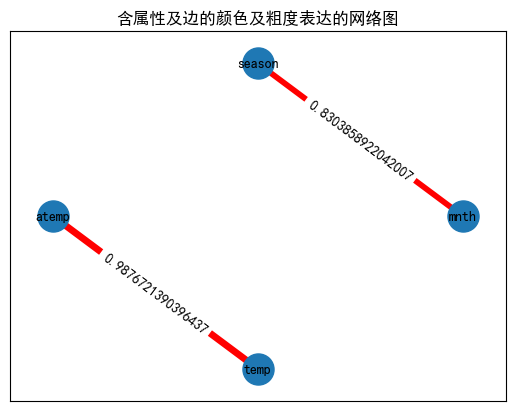

In [108]:
# 含属性及边的颜色及粗度表达的网络图
print('含属性及边的颜色及粗度表达的网络图')
colors = ['r' if abs(labels[e]) > 0.7 else 'b' for e in G.edges()]
widths = [abs(labels[e]) * 5 for e in G.edges()]
nx.draw_networkx(G, pos, with_labels=True, node_size=500, font_size=10, edge_color=colors, width=widths)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('含属性及边的颜色及粗度表达的网络图')
plt.show()

环形布局的网络图


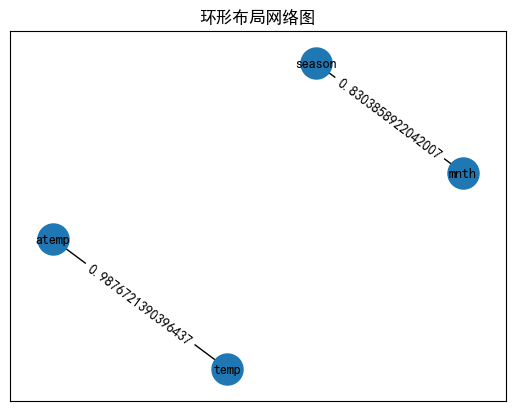

In [110]:
# 环形布局的网络图
print('环形布局的网络图')
pos = nx.kamada_kawai_layout(G)  # 环形布局算法之一
nx.draw_networkx(G, pos, with_labels=True, node_size=500, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('环形布局网络图')
plt.show()